In [3]:
# we want to train a model that will predict if client will leave a bank or not

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
y = df['Exited']

In [8]:
X = df.iloc[:, 3: 13].values

In [9]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
#pd.get_dummies(obj_df, columns=["Gender", "Geography"], prefix=["body", "drive"]).head()


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder() #initiate an object
X[:,1] = labelencoder_X_1.fit_transform(X[:,1]) 

labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2]) 

In [13]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
import numpy as np
ct = ColumnTransformer(#'encoder' is the name of the column transformer)
  [('encoder', OneHotEncoder(), [1])],  #the column to work on is 1, but can be 2 and 3
  remainder = 'passthrough')    #leave other columns untouched

X = np.array(ct.fit_transform(X), dtype = np.float)
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [14]:
#we remove the first column to avoid the dummy data trap
X = X[:,1:]
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [15]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [16]:
'''#one-hot encoding:
#way 2, using df
x_df = dataset.iloc[:,3:13]
x_df = pd.concat[(x_df, pd.get_dummies(x_df['Geography'], prefix = 'country', drop_first = True)], axos=1) #drops forst column
#axis=1 means to concatinate along the columns(put one column besides another)
x_df.drop(['Geography'], axis=1, implace=True) #get rid of original geography column 
x_df'''

"#one-hot encoding:\n#way 2, using df\nx_df = dataset.iloc[:,3:13]\nx_df = pd.concat[(x_df, pd.get_dummies(x_df['Geography'], prefix = 'country', drop_first = True)], axos=1) #drops forst column\n#axis=1 means to concatinate along the columns(put one column besides another)\nx_df.drop(['Geography'], axis=1, implace=True) #get rid of original geography column \nx_df"

In [17]:
#split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
#standardize the data 
'''mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std'''

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.734363,-0.573886,1.789744,0.912557,0.943942,1.042715,0.909825,-0.918722,0.640072,0.975305,-0.560873
1,-0.576580,1.742506,0.260405,-1.095822,2.359325,-0.350532,0.649509,-0.918722,0.640072,0.975305,-0.156221
2,-0.576580,1.742506,-0.225264,0.912557,-0.471440,0.346091,-1.220910,0.799318,0.640072,-1.025320,1.569218
3,-0.576580,1.742506,0.394739,-1.095822,-0.754517,-0.698844,1.014868,-0.918722,-1.562325,0.975305,0.357143
4,-0.576580,-0.573886,1.407409,0.912557,1.132660,-1.743780,-0.291139,-0.918722,-1.562325,0.975305,0.737628
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.576580,-0.573886,0.270738,0.912557,-0.848876,-1.395468,0.028652,-0.918722,-1.562325,0.975305,1.288797
7996,-0.576580,1.742506,-0.535265,0.912557,-0.565799,-0.350532,-0.394232,-0.918722,0.640072,-1.025320,0.199888
7997,1.734363,-0.573886,-1.971603,-1.095822,0.094713,0.346091,0.690343,0.799318,0.640072,-1.025320,-0.149070
7998,-0.576580,-0.573886,0.601406,-1.095822,-0.471440,-1.047156,0.564993,-0.918722,0.640072,-1.025320,-0.749696


In [19]:
import tensorflow
import keras 
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()

In [21]:
from tensorflow.keras.layers import Dense

In [22]:
model.add(Dense(units=6, input_shape=(11, ), kernel_initializer = 'uniform', activation = 'relu', name='dense_layer1'))

In [23]:
model.add(Dense(units=6, input_shape=(11, ),kernel_initializer = 'uniform',activation = 'relu', name='dense_layer2'))

In [24]:
model.add(Dense(1, activation = 'sigmoid', name = 'dense_output'))

In [25]:
model.compile(loss='binary_crossentropy',   #mean-squere error
              optimizer= 'adam',
              metrics = ['accuracy']) #we want to use adam optimizer

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 6)                 72        
_________________________________________________________________
dense_layer2 (Dense)         (None, 6)                 42        
_________________________________________________________________
dense_output (Dense)         (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [27]:
#training
history = model.fit(X_train, y_train, batch_size =10, epochs=100) #verbose=0)

Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.5575 - accuracy: 0.7860
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4214 - accuracy: 0.8198
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4082 - accuracy: 0.8301
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4078 - accuracy: 0.8338
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4139 - accuracy: 0.8255
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3909 - accuracy: 0.8401
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4037 - accuracy: 0.8344
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3896 - accuracy: 0.8409
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4008 - accuracy: 0.8330
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4059 - accura

In [28]:
df.shape

(8000, 11)

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8520


In [30]:
#predict using the info of a new customer
new_customer = [[0,0,600, 1,40,3,60000,2,1,1,50000]]
new_customer = sc.transform(sc.transform(new_customer))
new_prediction = model.predict(new_customer)
new_prediction = (new_prediction >0.5)
print(new_prediction)   #means customer will leave the bank

[[False]]


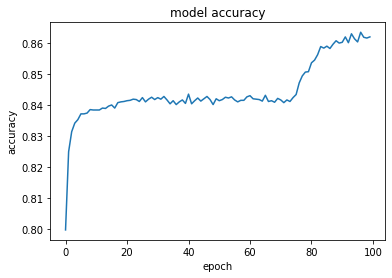

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show() #plot is not very informative as we ran training several times

In [32]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

history = model.fit(X,y,verbose=0,
                    batch = )
'''

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX = sc.fit_transform(X)\n\nhistory = model.fit(X,y,verbose=0,\n                    batch = )\n'

KeyError: ignored

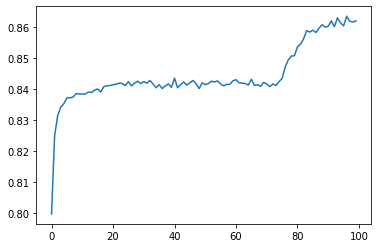

In [33]:
from matplotlib import pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy', 'validation accuracy', 'loss', 'validation_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(['epoch'])
plt.show()

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss',patience=5) 
#patience = the number of epochs to wait before stopping

#we want to save the best model, e.g. 5 echos before it stopped
callbacks = [early_stopping, ModelCheckpoint(filepath='best_model.h5', 
                                             monitor= 'val_loss',
                                             save_best_only=True)] 
history = model.fit(X_train, 
                    y_train, 
                    epochs=200, 
                    validation_split=0.25, 
                    batch_size=40, 
                    verbose=2, 
                    callbacks = [callbacks])

Epoch 1/200
150/150 - 1s - loss: 0.3323 - accuracy: 0.8603 - val_loss: 0.3293 - val_accuracy: 0.8620
Epoch 2/200
150/150 - 0s - loss: 0.3313 - accuracy: 0.8640 - val_loss: 0.3298 - val_accuracy: 0.8630
Epoch 3/200
150/150 - 0s - loss: 0.3313 - accuracy: 0.8628 - val_loss: 0.3307 - val_accuracy: 0.8635
Epoch 4/200
150/150 - 0s - loss: 0.3310 - accuracy: 0.8633 - val_loss: 0.3301 - val_accuracy: 0.8620
Epoch 5/200
150/150 - 0s - loss: 0.3311 - accuracy: 0.8637 - val_loss: 0.3312 - val_accuracy: 0.8640
Epoch 6/200
150/150 - 0s - loss: 0.3311 - accuracy: 0.8623 - val_loss: 0.3317 - val_accuracy: 0.8630


In [43]:
from sklearn.model_selection import KFold
n_split = 20
def create_model():
  model = Sequential()
  model.add(Dense(units=10, input_shape=(11, ), kernel_initializer = 'uniform', activation = 'relu', name='dense_layer1'))
  model.add(Dense(units=20, input_shape=(11, ), kernel_initializer = 'uniform', activation = 'relu', name='dense_layer2'))
  model.add(Dense(units=30, input_shape=(11, ),kernel_initializer = 'uniform',activation = 'relu', name='dense_layer3'))
  model.add(Dense(units=50, input_shape=(11, ),kernel_initializer = 'uniform',activation = 'relu', name='dense_layer4'))
  model.add(Dense(1, activation = 'sigmoid', name = 'dense_output'))
  model.compile(loss='binary_crossentropy',   #binary_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) #we want to use adam optimizer
  return model

for train_index, test_index in KFold(n_split).split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = create_model()
  model.fit(x_train, y_train, epochs=20)

  print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/20
297/297 [==============================] - 1s 1ms/step - loss: 0.5440 - accuracy: 0.7950
Epoch 2/20
297/297 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.8012
Epoch 3/20
297/297 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7941
Epoch 4/20
297/297 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7906
Epoch 5/20
297/297 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7971
Epoch 6/20
297/297 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7931
Epoch 7/20
297/297 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8023
Epoch 8/20
297/297 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7954
Epoch 9/20
297/297 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7929
Epoch 10/20
297/297 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7922

In [45]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

